In [2]:
#How much revenue was lost? (predict what it likely would have been and then compare to what it actually was?)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [4]:
data2019 = pd.read_csv("Resources/RevenuePassengerMiles2019.csv")
data2020 = pd.read_csv("Resources/RevenuePassengerMiles2020.csv")

In [5]:
combined_revenue = pd.merge(data2019, data2020, on= ["Month"], how = "outer")

In [6]:
combined_revenue.head()

,Year_x,Month,DOMESTIC_x,INTERNATIONAL_x,TOTAL_x,Year_y,DOMESTIC_y,INTERNATIONAL_y,TOTAL_y
0,2019.0,Jan,"54,357,953","22,507,073","76,865,026",2020.0,57630787.0,23373467.0,81004254.0
1,2019.0,Feb,"51,406,118","19,291,164","70,697,283",2020.0,55336176.0,18526225.0,73862401.0
2,2019.0,Mar,"65,407,750","24,488,323","89,896,073",2020.0,32526582.0,10221782.0,42748364.0
3,2019.0,Apr,"61,953,253","24,174,894","86,128,147",2020.0,2550811.0,342509.0,2893320.0
4,2019.0,May,"65,811,129","26,667,148","92,478,276",2020.0,6987716.0,468622.0,7456338.0


In [7]:
combined_revenue = combined_revenue.rename(columns={"DOMESTIC_x": "Domestic 2019", "INTERNATIONAL_x": "International 2019", "TOTAL_x": "Total 2019", "DOMESTIC_y": "Domestic 2020", "INTERNATIONAL_y": "International 2020", "TOTAL_y": "Total 2020"})

In [8]:
combined_revenue

,Year_x,Month,Domestic 2019,International 2019,Total 2019,Year_y,Domestic 2020,International 2020,Total 2020
0,2019.0,Jan,"54,357,953","22,507,073","76,865,026",2020.0,57630787.0,23373467.0,81004254.0
1,2019.0,Feb,"51,406,118","19,291,164","70,697,283",2020.0,55336176.0,18526225.0,73862401.0
2,2019.0,Mar,"65,407,750","24,488,323","89,896,073",2020.0,32526582.0,10221782.0,42748364.0
3,2019.0,Apr,"61,953,253","24,174,894","86,128,147",2020.0,2550811.0,342509.0,2893320.0
4,2019.0,May,"65,811,129","26,667,148","92,478,276",2020.0,6987716.0,468622.0,7456338.0
...,...,...,...,...,...,...,...,...,...
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
combined_revenue = combined_revenue.drop(columns=["Year_x", "Year_y"])


In [10]:
combined_revenue = combined_revenue.dropna()
combined_revenue

,Month,Domestic 2019,International 2019,Total 2019,Domestic 2020,International 2020,Total 2020
0,Jan,"54,357,953","22,507,073","76,865,026",57630787.0,23373467.0,81004254.0
1,Feb,"51,406,118","19,291,164","70,697,283",55336176.0,18526225.0,73862401.0
2,Mar,"65,407,750","24,488,323","89,896,073",32526582.0,10221782.0,42748364.0
3,Apr,"61,953,253","24,174,894","86,128,147",2550811.0,342509.0,2893320.0
4,May,"65,811,129","26,667,148","92,478,276",6987716.0,468622.0,7456338.0
5,Jun,"68,413,114","29,322,269","97,735,383",14007580.0,884139.0,14891719.0
6,Jul,"71,276,327","30,447,264","101,723,592",20061944.0,1963035.0,22024980.0
7,Aug,"68,147,755","29,802,655","97,950,411",20942793.0,2597972.0,23540765.0
8,Sep,"58,213,654","25,083,576","83,297,229",20474546.0,2559885.0,23034431.0
9,Oct,"63,323,789","24,290,255","87,614,044",24425632.0,3401659.0,27827292.0


In [11]:
revenue_totals = combined_revenue[["Month", "Total 2019", "Total 2020"]]
revenue_totals

,Month,Total 2019,Total 2020
0,Jan,"76,865,026",81004254.0
1,Feb,"70,697,283",73862401.0
2,Mar,"89,896,073",42748364.0
3,Apr,"86,128,147",2893320.0
4,May,"92,478,276",7456338.0
5,Jun,"97,735,383",14891719.0
6,Jul,"101,723,592",22024980.0
7,Aug,"97,950,411",23540765.0
8,Sep,"83,297,229",23034431.0
9,Oct,"87,614,044",27827292.0


In [21]:
revenue_totals['Total 2019'] = revenue_totals['Total 2019'].str.replace(",","")
revenue_totals['Total 2019'] = revenue_totals["Total 2019"].astype(int)

<ipython-input-21-89710a673f79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_totals['Total 2019'] = revenue_totals['Total 2019'].str.replace(",","")
<ipython-input-21-89710a673f79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_totals['Total 2019'] = revenue_totals["Total 2019"].astype(int)


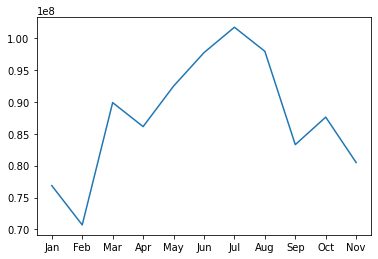

In [25]:
revenue_totals.columns
x_axis = revenue_totals["Month"]
y_axis = revenue_totals["Total 2019"]
plt.plot (x_axis, y_axis)

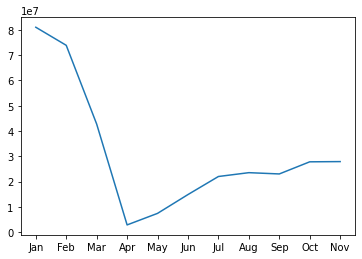

In [26]:
revenue_totals.columns
x_axis_2020 = revenue_totals["Month"]
y_axis_2020 = revenue_totals["Total 2020"]
plt.plot (x_axis_2020, y_axis_2020)